In [4]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [4]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2
10.225640,Site 2


In [ ]:
* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [5]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [7]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the boostrapping-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [8]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


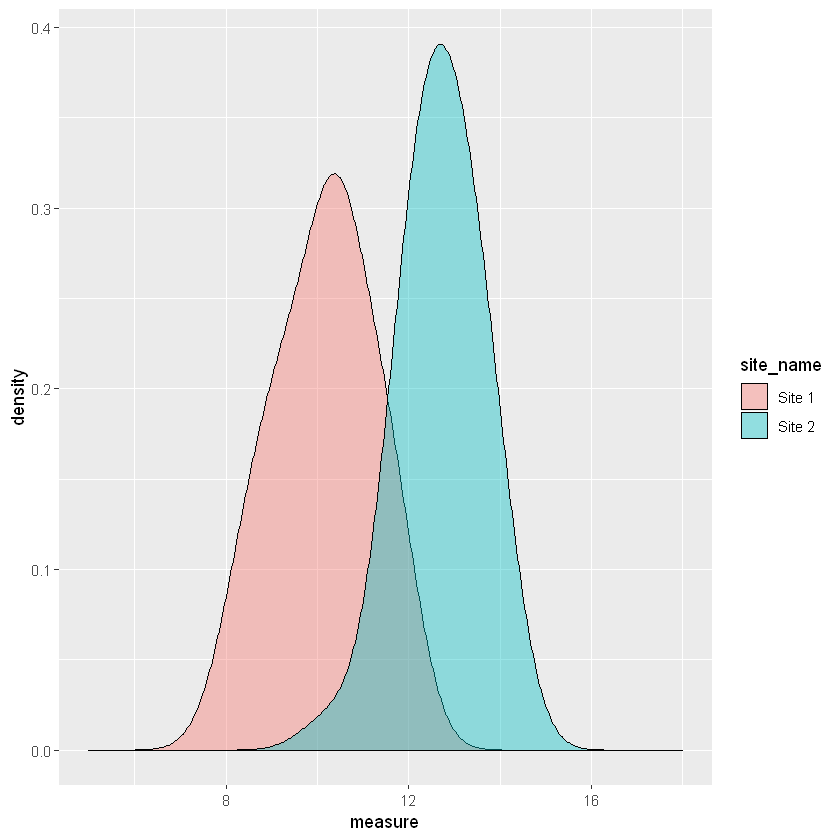

In [9]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [10]:
t.test(data_1$measure, data_2$measure)


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -12.056, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.975853 -2.131763
sample estimates:
mean of x mean of y 
 10.14979  12.70360 


In [12]:
passes_t_test = replicate(10000, 
    t.test(data_1$measure, data_2$measure)$p.value
)  < 0.05

In [13]:
sum(passes_t_test) / length(passes_t_test)

[1] 1

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [6]:
kind = c('P. lobata', 'P. lobata', 'M. capitata', 'M. capitata', 'P. mendrina', 'P. mendrina')
ratios = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
site = rep(c("X", "Y"), 3)


coral_proportions = tibble(kind, ratios, site)
coral_proportions

kind,ratios,site
P. lobata,0.60,X
P. lobata,0.61,Y
M. capitata,0.19,X
M. capitata,0.19,Y
P. mendrina,0.21,X
P. mendrina,0.20,Y


In [7]:
sampleOneIteration = function(){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}
sampleOneIteration()

[1] 0.04

In [8]:
tvds = replicate(1000, sampleOneIteration())

In [10]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}
observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$kind, subtract_abs))/2

In [11]:
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

[1] 0.952